<IPython.core.display.Javascript object>


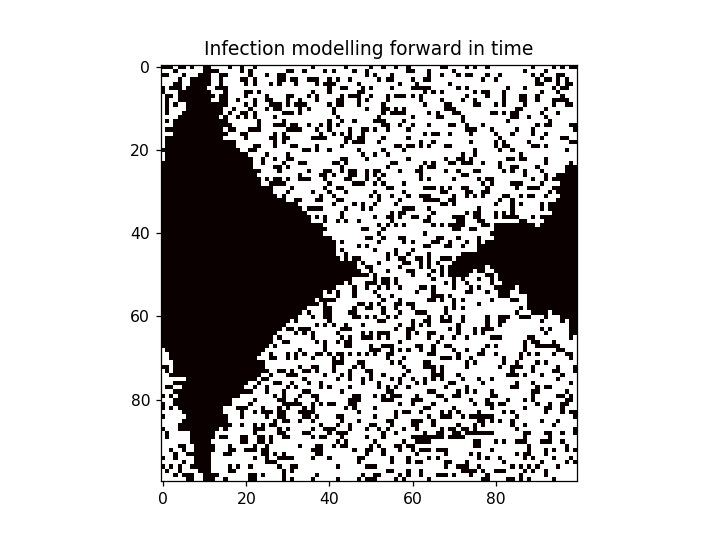

In [27]:
%matplotlib notebook
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation


fig = plt.figure()
imgs = []
ax = fig.add_subplot(111)

# Simulates the epidemic forward in time
# N is the size of the population, days is how long to simulate, beta gamma eta nu are transition probabilities
def forwardEpidemic(beta,gamma,eta,nu,N,days):
    
    if(checkParams(beta,gamma,eta,nu,N,days)):
        print("change input parameters and try again")
        return
    
    population = initPopulation(N)
    f = np.array(population)
    im = ax.imshow(f, cmap="hot")
    imgs.append([im])



    # iterate through each day, spreading infection/recovering/etc...
    t = 0
    while t <= days:
        population = modelDay(population,beta,gamma,eta,nu)
        t = t+1
        f = np.array(population)
        ax.set_title('Infection modelling forward in time')
        im = ax.imshow(f, cmap="hot")
        imgs.append([im])
    

    


# initiate population to all susceptible except one infected
def initPopulation(N):
    population= [[0 for i in range(N)] for j in range(N)]
    population[random.randint(0,N-1)][random.randint(0,N-1)] = 1
    return population
    
# check for acceptable user input   
def checkParams(beta,gamma,eta,nu,N,days):
    retval = 0
    if beta < 0:
        print("impossible beta")
        retval = 1
    if eta < 0:
        print("impossible eta")
        retval = 1
    if gamma < 0:
        print("impossible gamma")
        retval = 1
    if nu < 0:
        print("impossible nu")
        retval = 1
    if N < 0:
        print("impossible population size")
        retval = 1
    if days < 0:
        print("time doesnt go backwards stupid, don't break causality")
        retval = 1
 
    return retval
    
# Probibalistically models all transitions a single timestep the day
def modelDay(population,beta,gamma,eta,nu):
    N = len(population)
    for j in range (0,N):
        for i in range (0,N):
            
                # Chance to get infected by neighbour(s) (for all models)
            if getsInfected(population,i,j,beta):
                population[i][j] = 3
                    
                # Chance to recover from infected (for SIR and SIRS model)
            if recovers(population,i,j,gamma):
                population[i][j] = 2
                    
                # Chance to become susceptible again after recovering (for SIRS model)
            if susceptible(population,i,j,eta):
                population[i][j] = 0
                
            # Chance to become resusceptible from infected (for SIS model)
            if resusceptible(population,i,j,nu):
                population[i][j] = 0

        # end of timestep, replace just infected for regular infected
    for j in range(0,N):
        for i in range(0,N):
            if population[i][j] == 3:
                population[i][j] = 1

    return population

def getsInfected(A,i,j,beta):
    N = len(A)
    if A[i][j] == 0:
        infectionChance = random.random()
        return infectionChance < 1 - (1-beta)**infectedNeighbourCount(A,i,j)
        
def recovers(A,i,j,gamma):
    if A[i][j] == 1:
        recoveryChance = random.random()
        return recoveryChance < gamma
    
def susceptible(A,i,j,eta):
    if A[i][j] == 2:
        susceptibleChance = random.random()
        return susceptibleChance < eta
    
def resusceptible(A,i,j,nu):
    if A[i][j] == 1:
        resusceptibleChance = random.random()
        return resusceptibleChance < nu
    
def infectedNeighbourCount(A,i,j):
    N = len(A)
    count = 0
    if A[(i+1) % N][j % N] == 1:
        count = count + 1
    if A[(i-1) % N][j % N] == 1:
        count = count + 1
    if A[i % N][(j+1) % N] == 1:
        count = count + 1
    if A[i % N][(j-1) % N] == 1:
        count = count + 1
    return count
    

forwardEpidemic(0.5,0,0,0.25,100,140)
ani = animation.ArtistAnimation(fig, imgs, interval=100, blit=True, repeat_delay=1000)
plt.show()
